In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from pathlib import Path

In [2]:
import utils

import importlib
importlib.reload(utils)

<module 'utils' from '/home/tom/Documents/UNT/csce6260/projects/kitti-experiments/rgb/utils.py'>

## Load data

In [3]:
base = Path.home() / "kitti"
train_dir = base / "training"
test_dir = base / "testing"

In [4]:
train_img_dir = train_dir / "image_2"
kitti_images_train = sorted(train_img_dir.glob("*.png"))
test_img_dir = test_dir / "image_2"
kitti_images_test = sorted(test_img_dir.glob("*.png"))
print(f"# of training / testing images: {len(kitti_images_train)} / {len(kitti_images_test)}")

# of training / testing images: 7481 / 7518


In [5]:
train_labels_dir = train_dir / "label_2"
kitti_train_labels = sorted(train_labels_dir.glob("*.txt"))
print("# of training label files: {}".format(len(kitti_train_labels)))
example_label_file = utils.parse_label_file(kitti_train_labels[0])
print(example_label_file)

# of training label files: 7481
[{'type': 'Pedestrian', 'truncated': 0.0, 'occluded': 0, 'alpha': -0.2, 'bbox_2d_min': (712.4, 143.0), 'bbox_2d_max': (810.73, 307.92), 'dimensions': (1.89, 0.48, 1.2), 'centroid': (1.84, 1.47, 8.41), 'rotation_y': 0.01}]


## KITTI Object Type Distribution

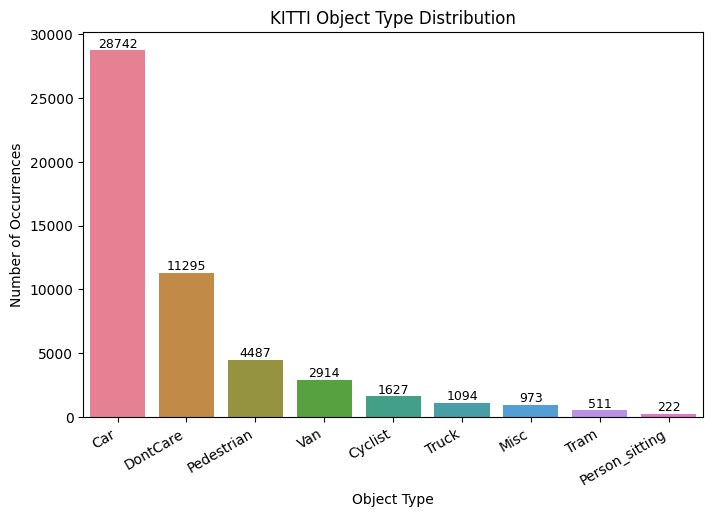

In [6]:
kitti_object_types = Counter()
for label_file in kitti_train_labels:
    parsed_labels = utils.parse_label_file(label_file)
    for label in parsed_labels:
        kitti_object_types[label['type']] += 1

kitti_object_types = dict(sorted(kitti_object_types.items(), key=lambda x: x[1], reverse=True))

object_types = list(kitti_object_types.keys())
occurrences = list(kitti_object_types.values())

palette = sns.color_palette("husl", len(object_types))

plt.figure(figsize=(8, 5))
sns.barplot(
    x=object_types, 
    y=occurrences, 
    hue=object_types,
    palette=palette,
    legend=False
)

for i, v in enumerate(occurrences):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=9)

plt.title("KITTI Object Type Distribution")
plt.xlabel("Object Type")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=30, ha='right')

plt.show()

## Bounding Box Statistics: Average Width and Height


In [7]:
detections = []
for label_file in kitti_train_labels:
    parsed_labels = utils.parse_label_file(label_file)
    for label in parsed_labels:
        detection = (
            label['type'],
            label['bbox_2d_min'][0],
            label['bbox_2d_min'][1],
            label['bbox_2d_max'][0],
            label['bbox_2d_max'][1]
        )
        detections.append(detection)

df = pd.DataFrame(detections, columns=["class", "x_min", "y_min", "x_max", "y_max"])
df["width"] = df["x_max"] - df["x_min"]
df["height"] = df["y_max"] - df["y_min"]
avg_dims = df.groupby("class")[["width", "height"]].mean().round(2).reset_index()
avg_dims

,class,width,height
0,Car,111.95,66.12
1,Cyclist,55.85,76.89
2,DontCare,53.37,25.65
3,Misc,90.72,74.46
4,Pedestrian,43.82,103.72
5,Person_sitting,83.64,102.28
6,Tram,153.41,104.22
7,Truck,99.72,86.41
8,Van,109.65,83.60
